In [1]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
print(physical_devices)


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
import torch

# Check if GPU (Metal) is available and select it
device = "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using device: {device}")



Using device: mps


In [2]:
!pip install ultralytics

/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.8/906.8 kB 16.4 MB/s eta 0:00:00a 0:00:01


In [3]:
from ultralytics import YOLO
from IPython.display import display, Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [12]:
# !cp -r /kaggle/input/underwater-plastic-pollution-detection/underwater_plastics /kaggle/working/

In [11]:
# import requests

# # URL of the YOLOv8s model
# url = "https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8s.pt"

# # File name to save the model
# model_path = "/kaggle/working/underwater_plastics/yolov8s.pt"

# # Download the file
# print("Downloading yolov8s.pt...")
# response = requests.get(url, stream=True)
# with open(model_path, "wb") as f:
#     for chunk in response.iter_content(chunk_size=8192):
#         if chunk:  # Filter out keep-alive chunks
#             f.write(chunk)
# print(f"Model downloaded and saved to {model_path}")


Model downloaded and saved to /kaggle/working/yolov8s.pt


In [13]:
# !mv /kaggle/working/yolov8s.pt /kaggle/working/underwater_plastics/

In [14]:
# %cd /kaggle/working/underwater_plastics

/kaggle/working/underwater_plastics


In [15]:
# !ls

data.yaml  test  train	valid  yolov8s.pt


In [22]:
!wandb disabled

W&B disabled.


In [5]:
!yolo train model=yolov8n.pt data=/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/data.yaml epochs=20 imgsz=200 batch=64

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/data.yaml, epochs=20, time=None, patience=100, batch=64, imgsz=200, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf

In [ ]:
#!ls runs/detect/train/

args.yaml					    results.png		   val_batch0_pred.jpg
confusion_matrix.png				    train_batch0.jpg	   val_batch1_labels.jpg
events.out.tfevents.1716026090.21ac9230964e.3828.0  train_batch1.jpg	   val_batch1_pred.jpg
F1_curve.png					    train_batch2.jpg	   val_batch2_labels.jpg
P_curve.png					    train_batch460.jpg	   val_batch2_pred.jpg
PR_curve.png					    train_batch461.jpg	   weights
R_curve.png					    train_batch462.jpg
results.csv					    val_batch0_labels.jpg


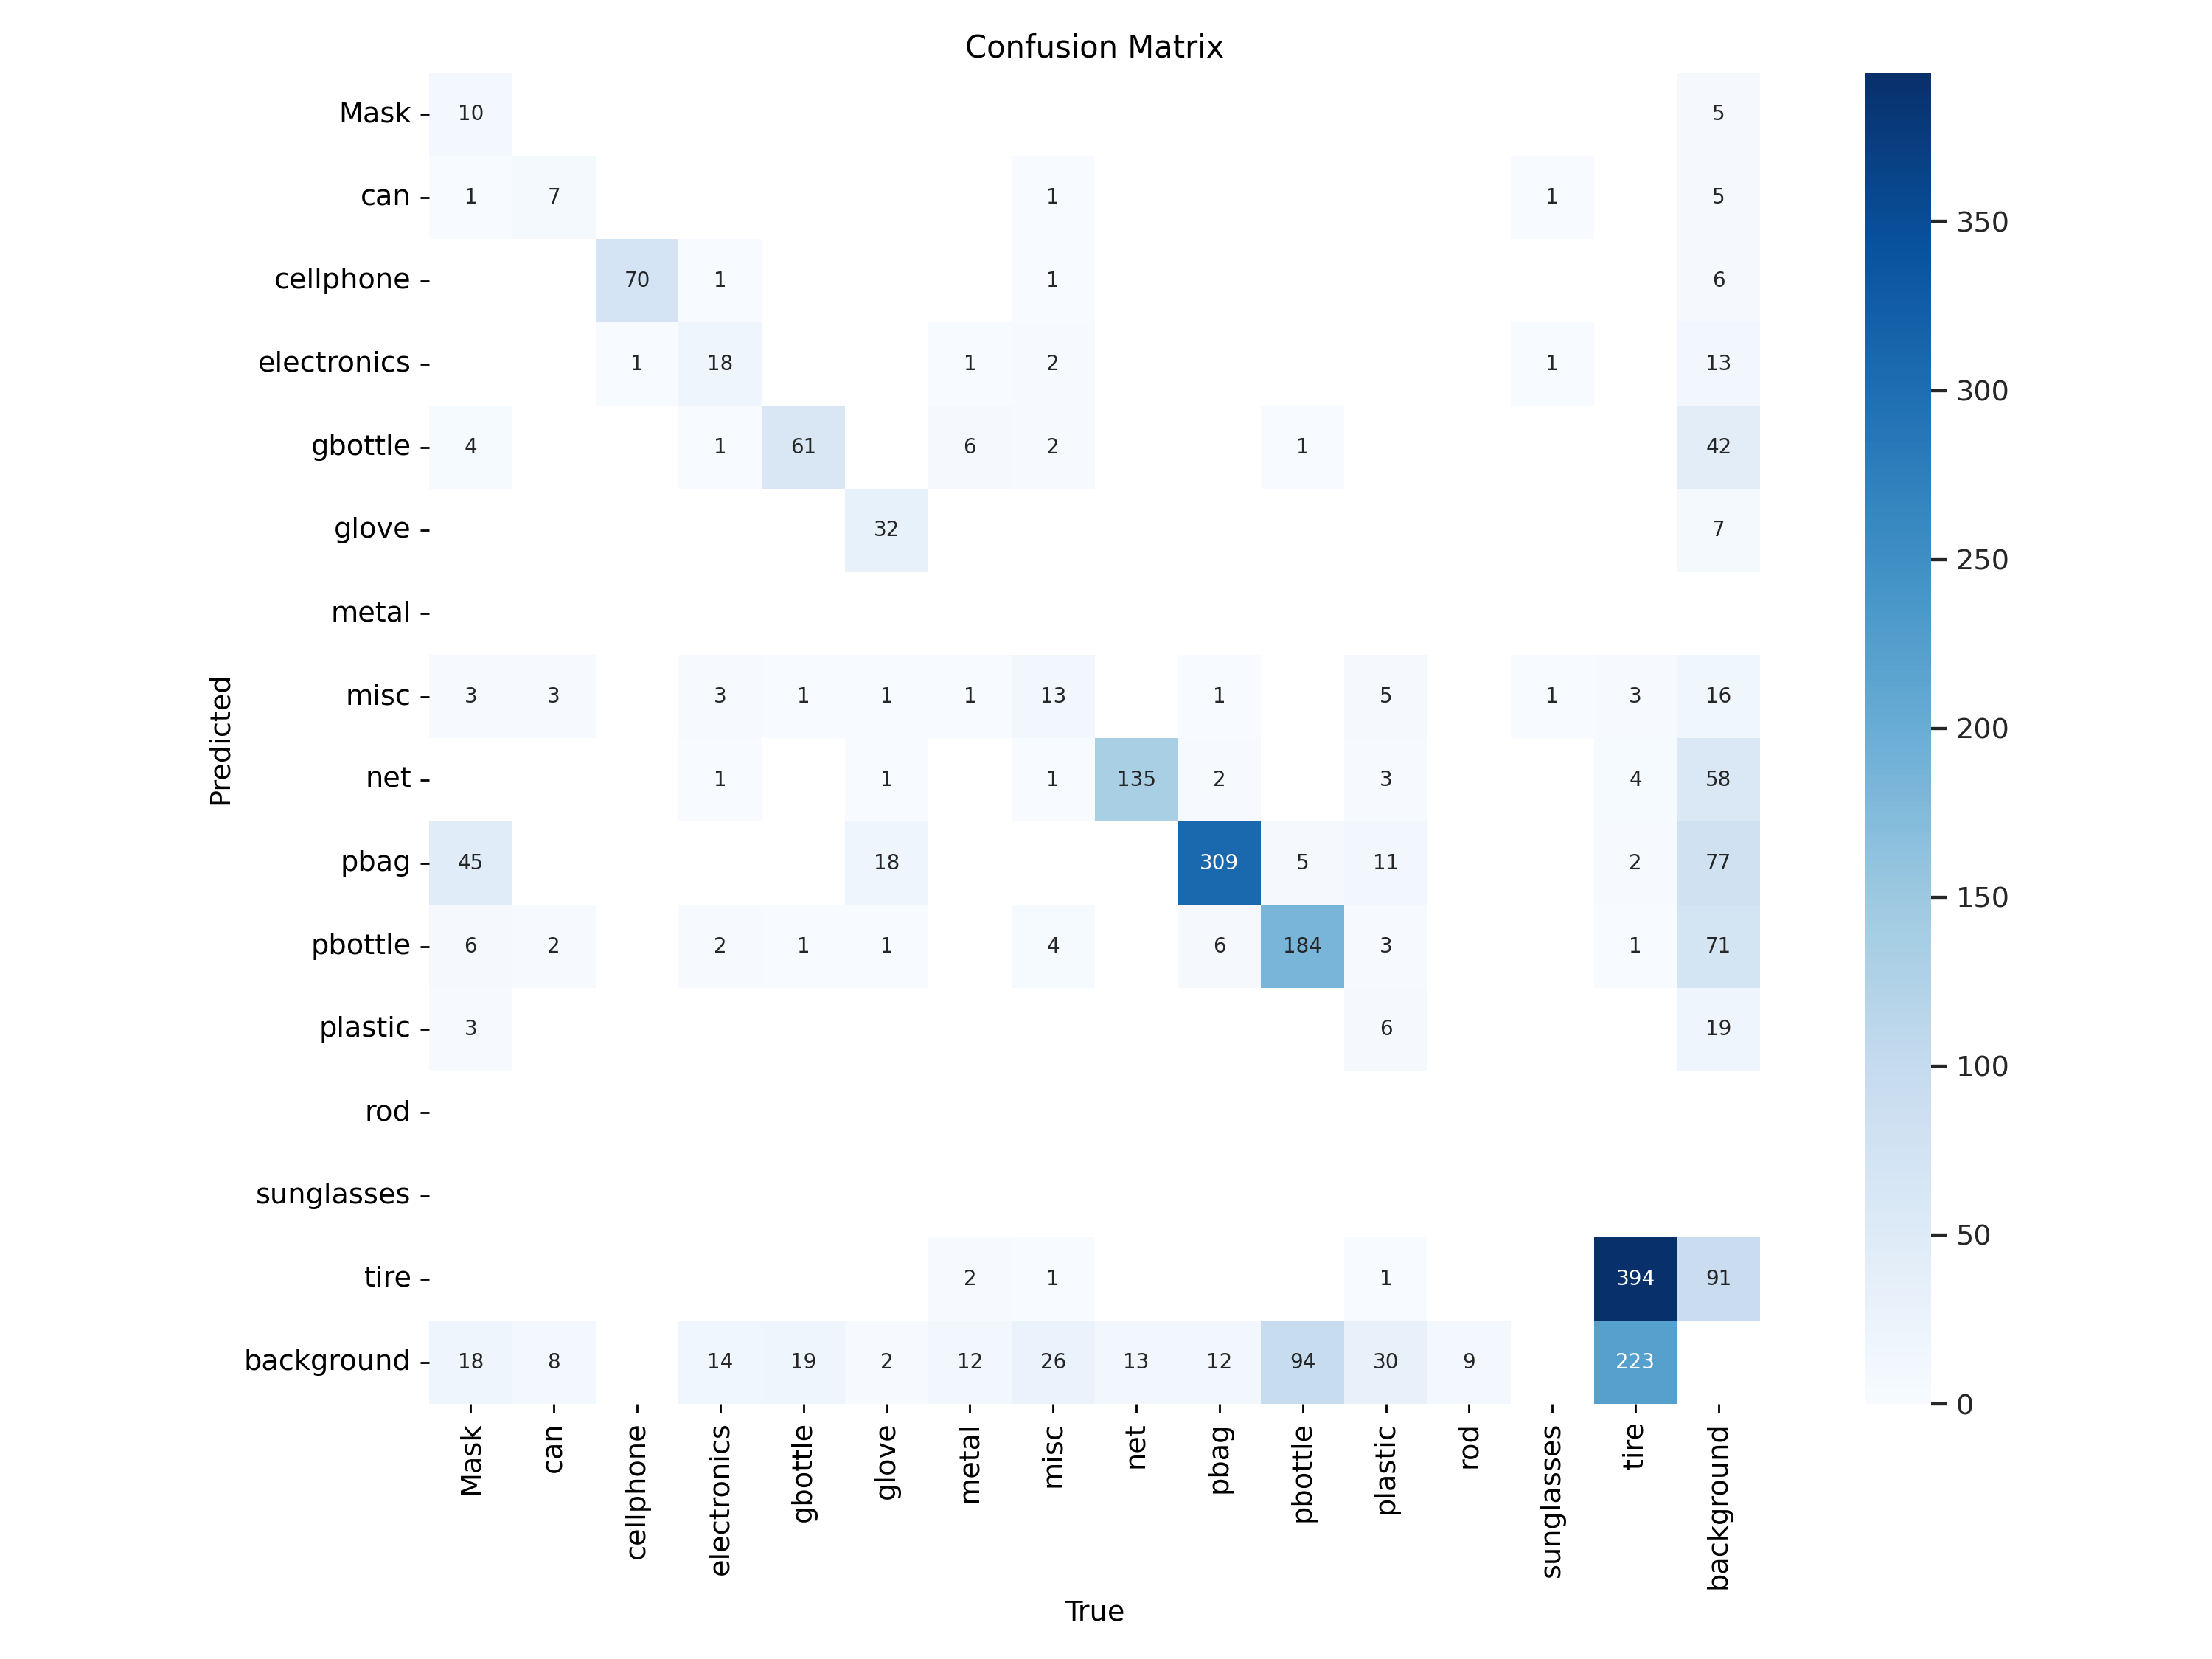

In [7]:
Image(filename='/kaggle/working/runs/detect/train2/confusion_matrix.png', width=1000)


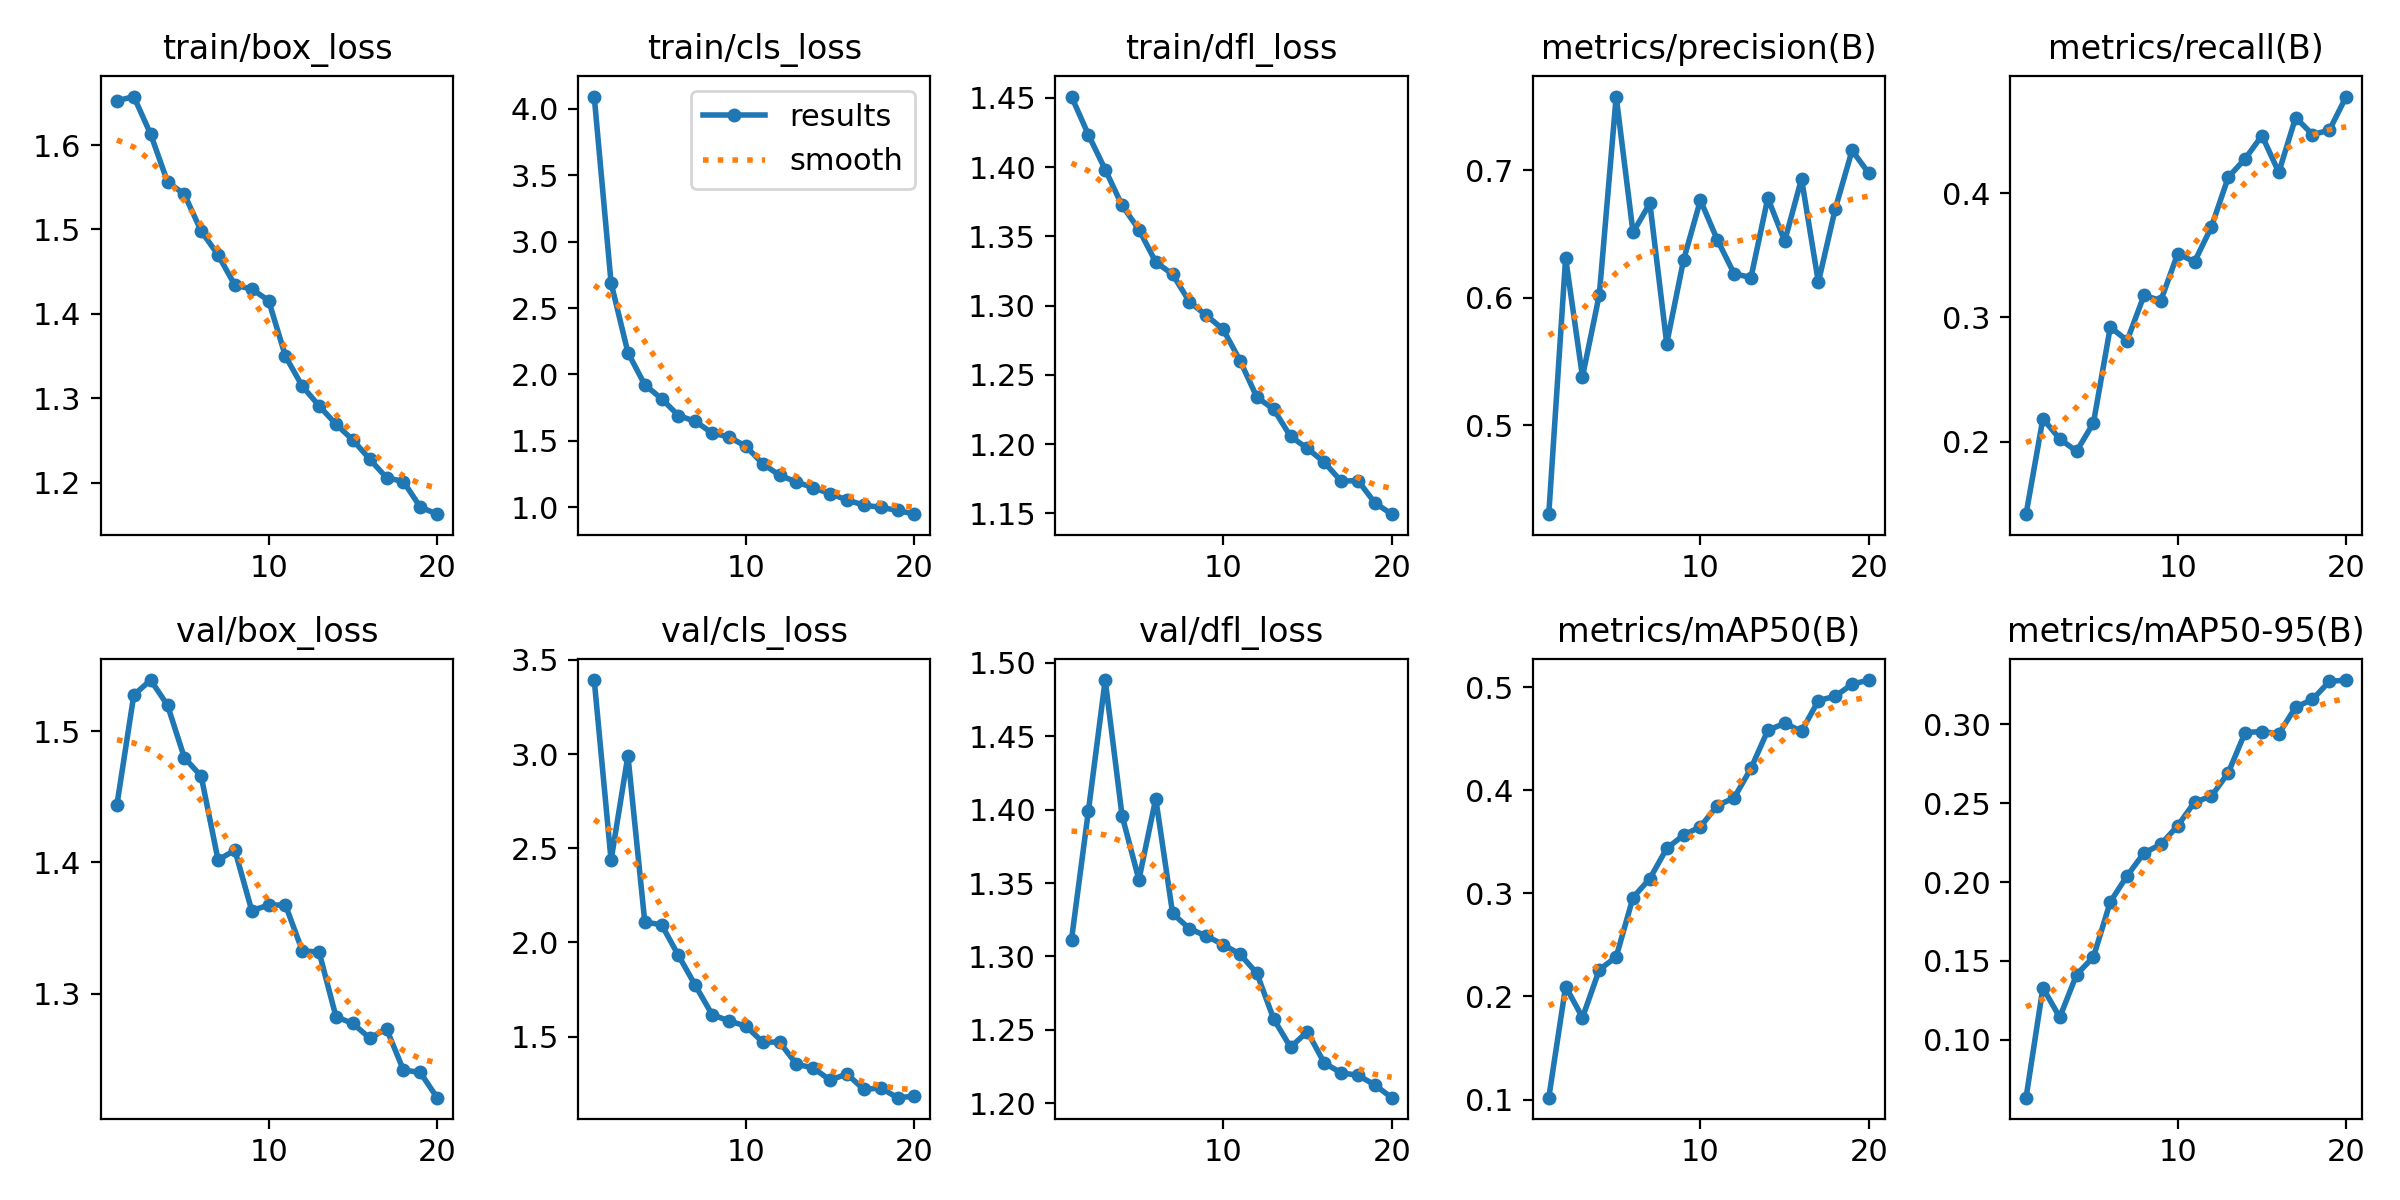

In [8]:
Image(filename='/kaggle/working/runs/detect/train2/results.png', width=1000)

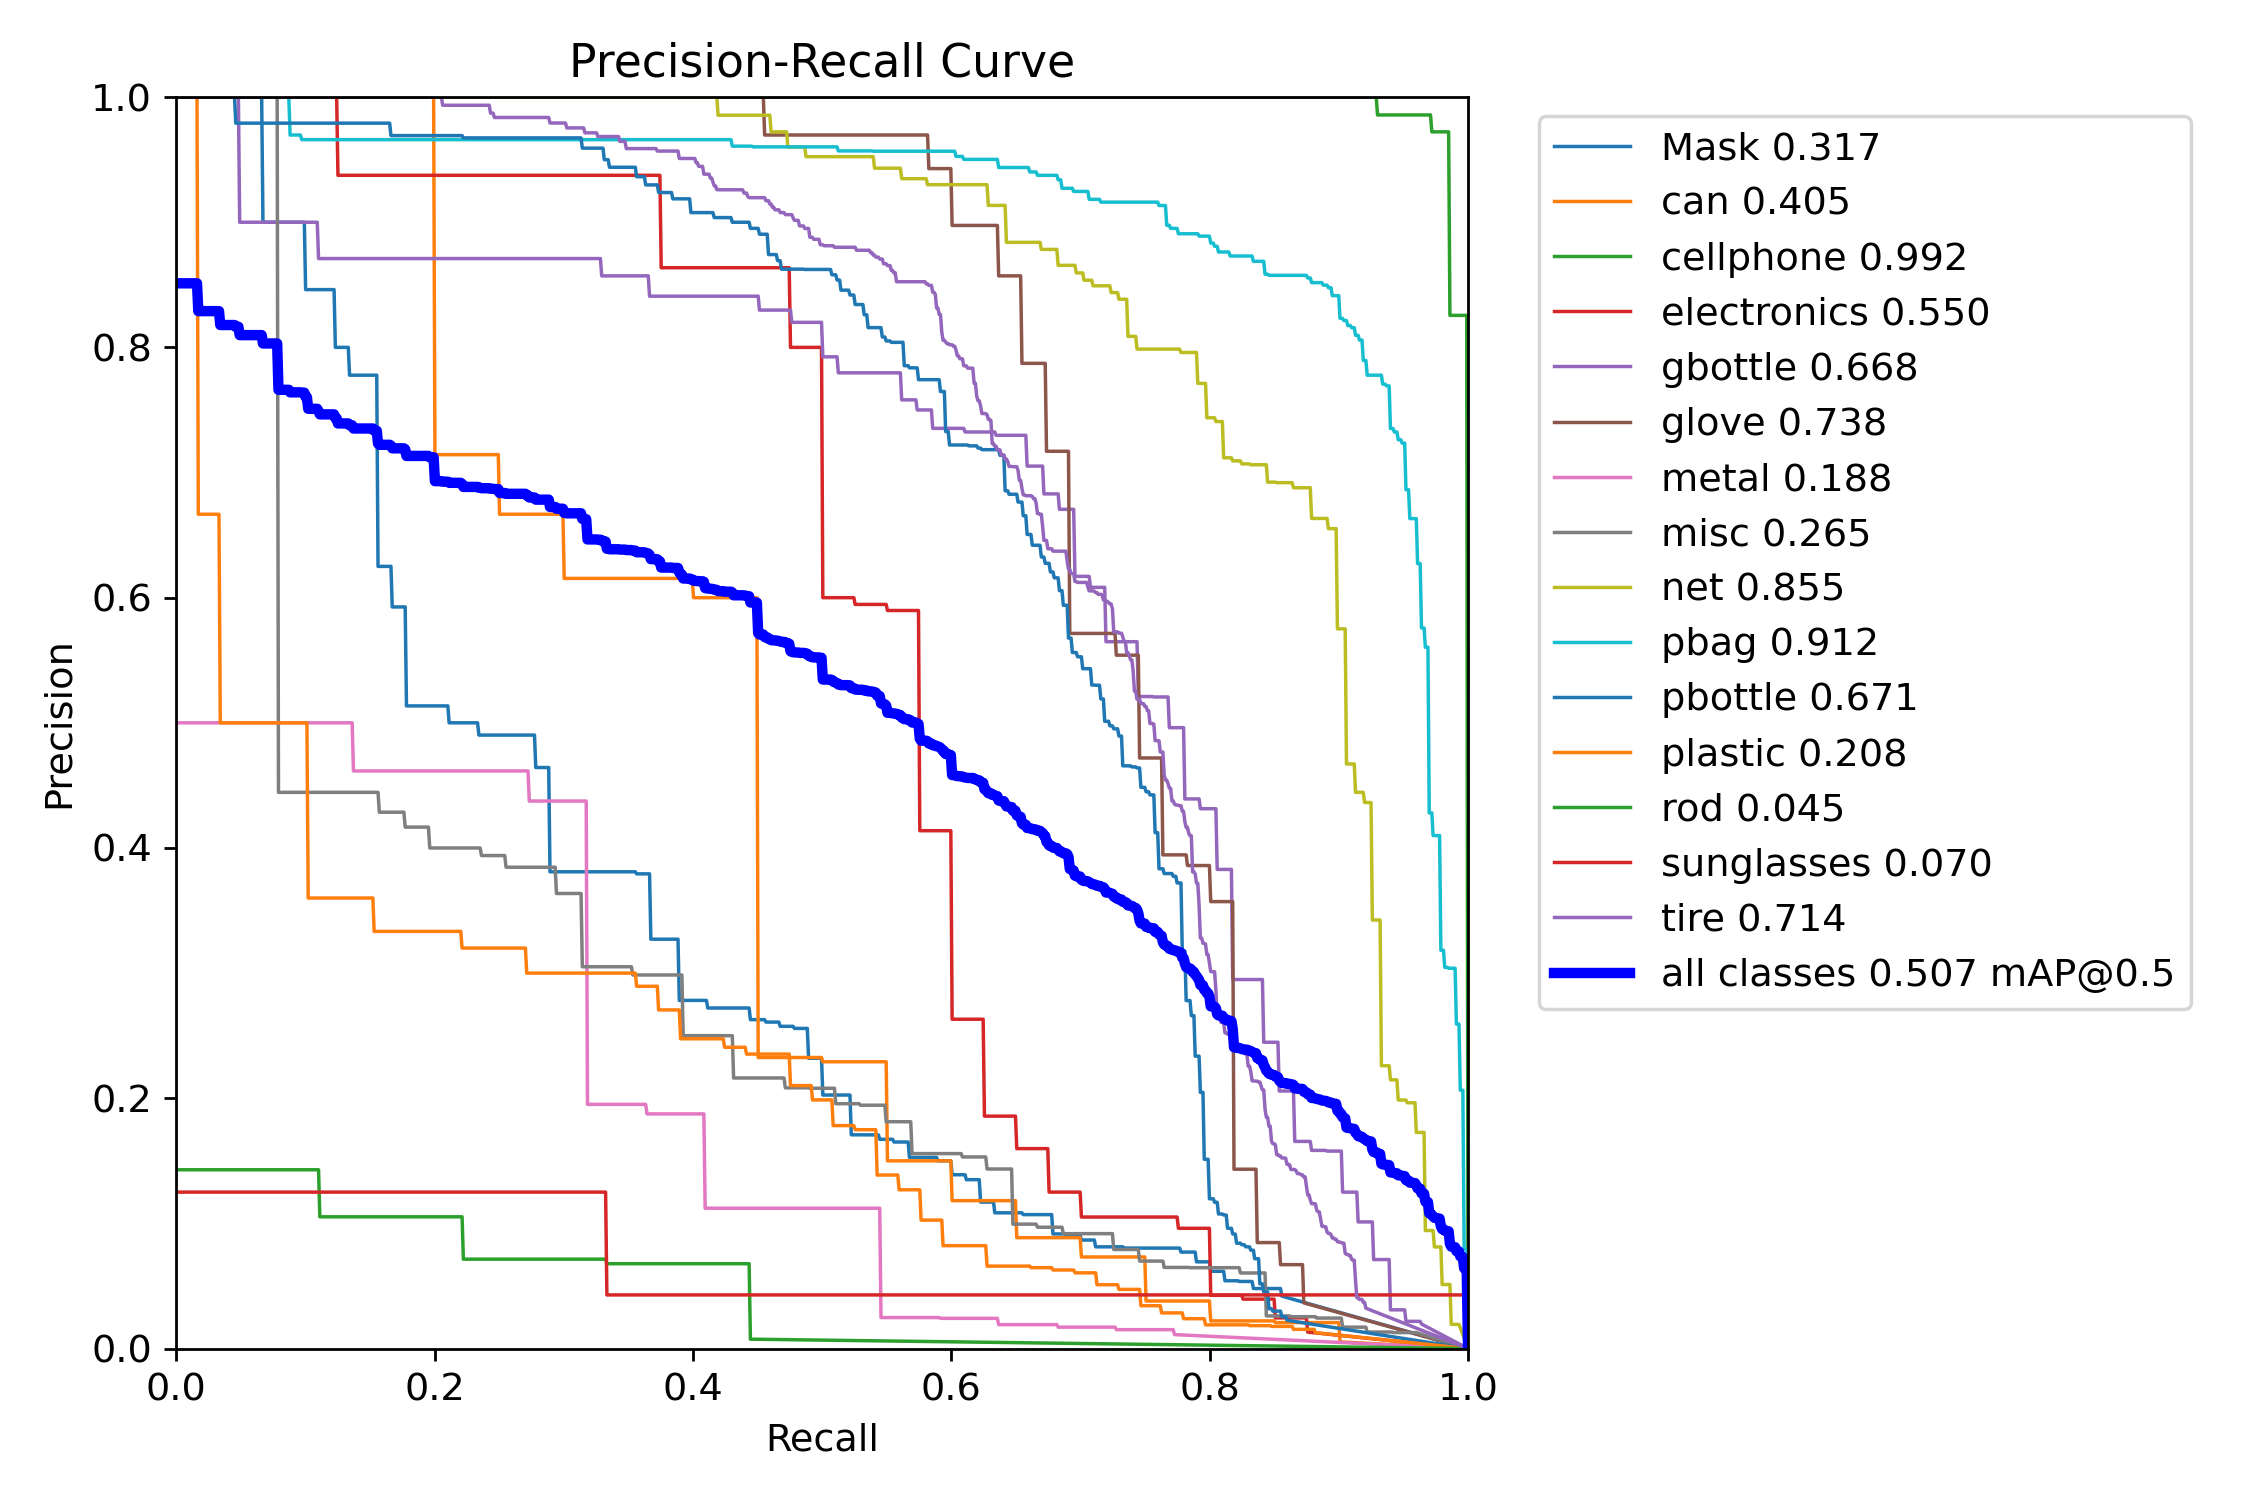

In [9]:
Image(filename='/kaggle/working/runs/detect/train2/PR_curve.png', width=1000)

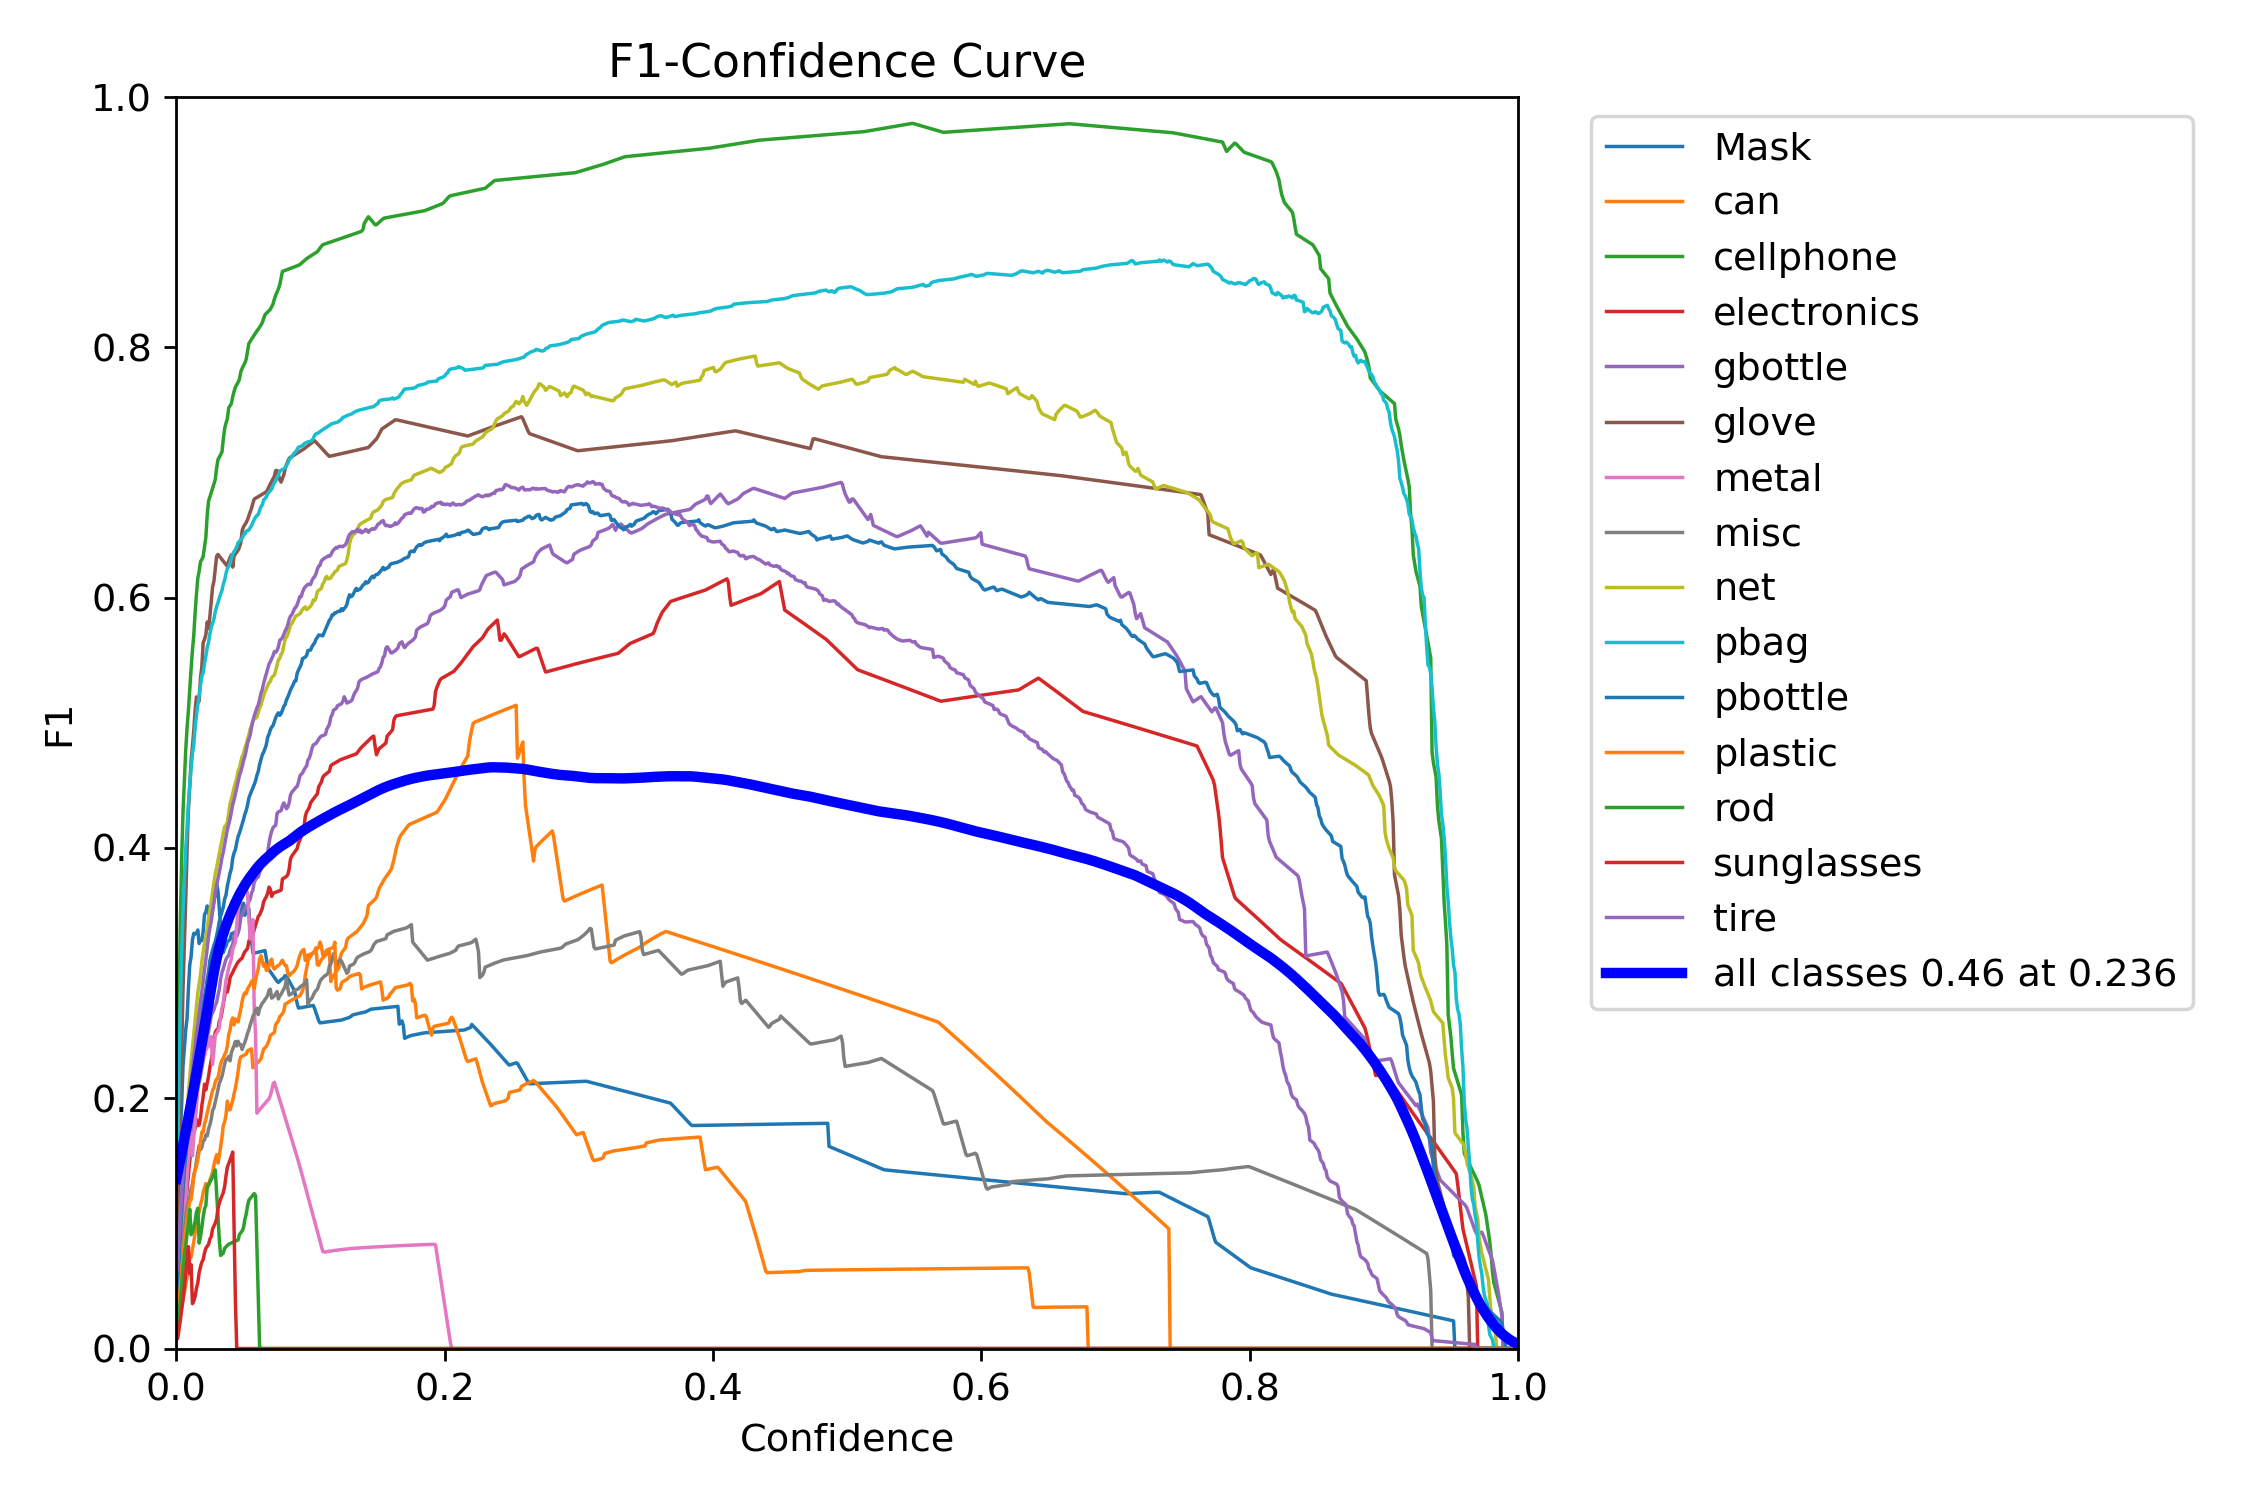

In [11]:
Image(filename='/kaggle/working/runs/detect/train2/F1_curve.png', width=1000)

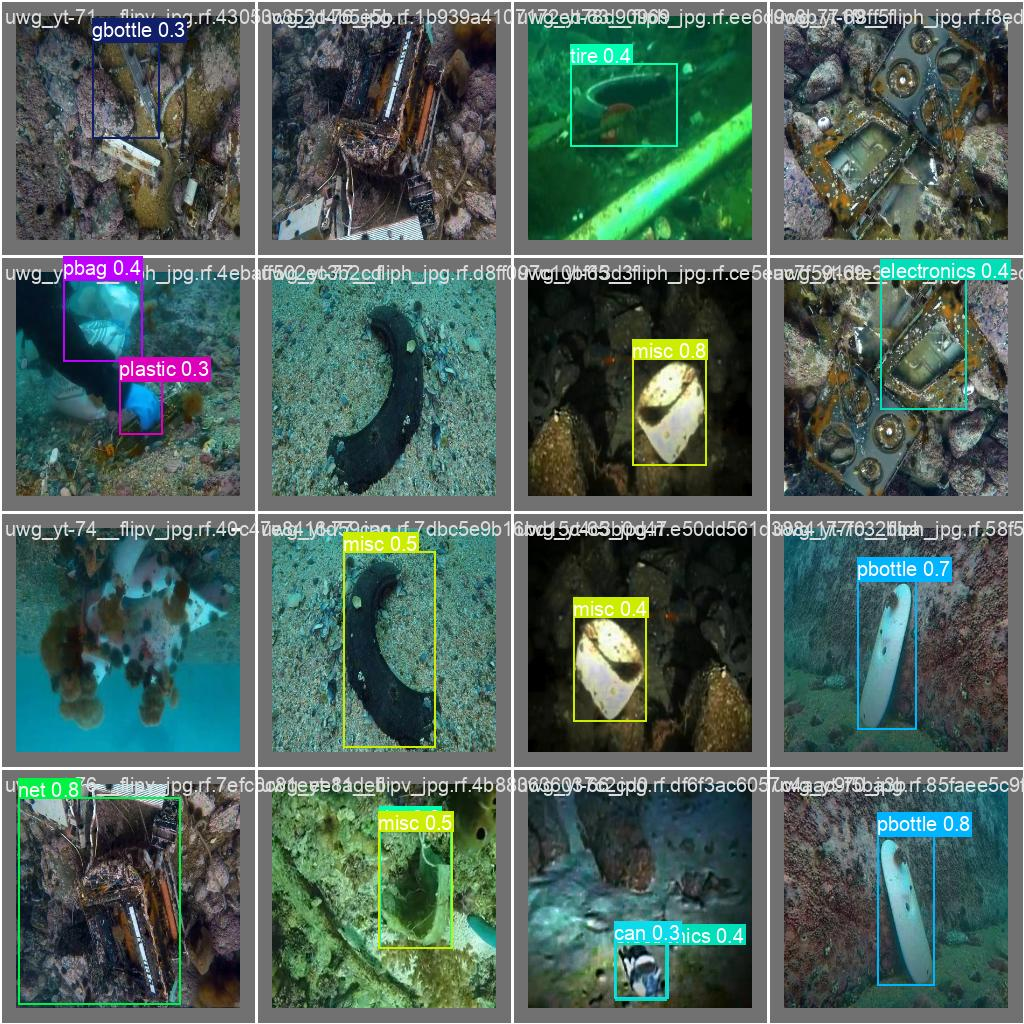

In [13]:
Image(filename='/kaggle/working/runs/detect/train2/val_batch0_pred.jpg', width=1000)

In [15]:
#%cd /content/drive/MyDrive/Tea

!yolo task=detect mode=val model= /kaggle/working/runs/detect/train2/weights/best.pt  data=/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/data.yaml

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /kaggle/input/underwater-plastic-pollution-detection/underwater_pl
val: WARNING ⚠️ Cache directory /kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/valid is not writeable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1001       1891      0.698      0.478      0.507      0.328
                  Mask         77         90      0.764      0.144      0.317      0.195
                   can         18         20      0.575       0.45       0.41      0.109
             cellphone         61         71       0.88      0.986      0.992       0.84
           electronics         27         40      0.591      0.575      0.552      0.316
               gbottle         36         82      0.517      0.768      

In [18]:
import numpy as np

csv_file_path = '/kaggle/working/runs/detect/train2/results.csv'
data = np.genfromtxt(csv_file_path, delimiter=',', skip_header=1)

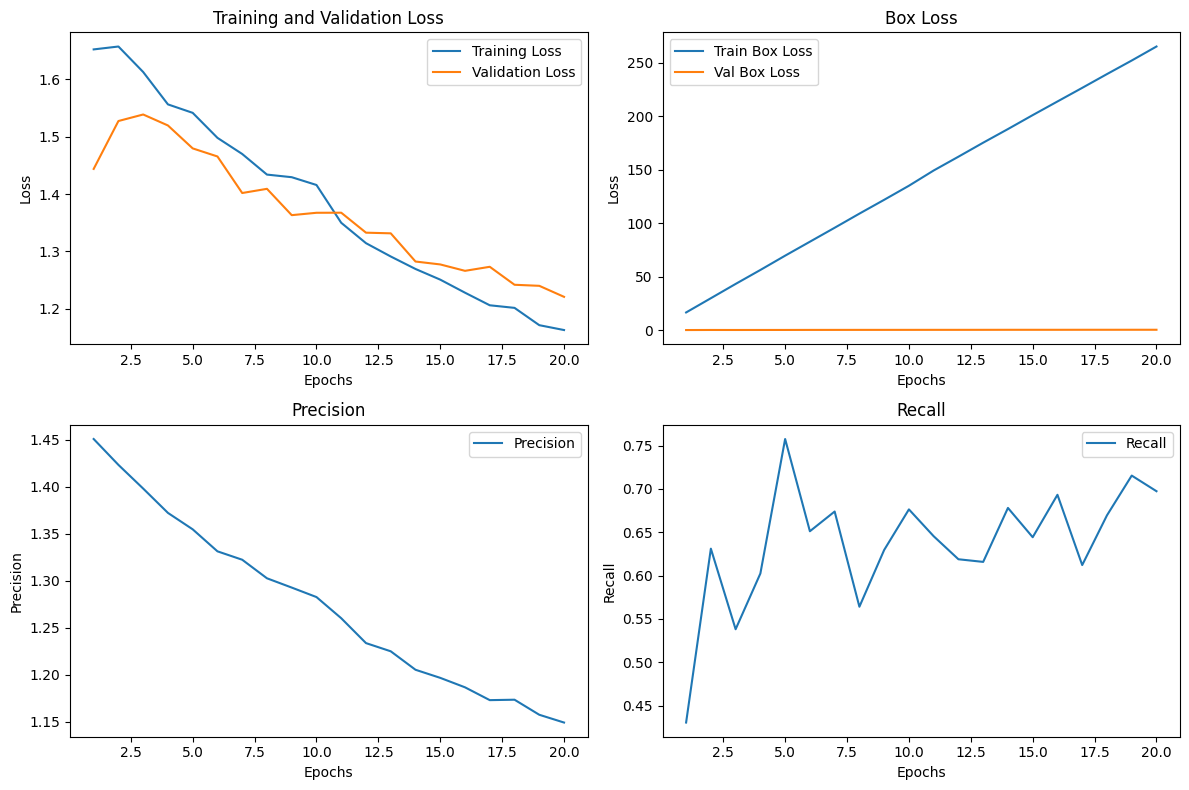

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

plt.subplot( 2,2,1)
plt.plot(data[:, 0], data[:, 2], label='Training Loss')
plt.plot(data[:, 0], data[:, 9], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot( 2,2,2)
plt.plot(data[:, 0], data[:, 1], label='Train Box Loss')
plt.plot(data[:, 0], data[:, 8], label='Val Box Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Box Loss')


plt.subplot( 2,2,3)
plt.plot(data[:, 0], data[:, 4], label='Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision')

plt.subplot( 2,2, 4)
plt.plot(data[:, 0], data[:, 5], label='Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.title('Recall')

plt.tight_layout()
plt.show()